# Lesson 13: Final Project

## Intro to Quantified Cognition

<a href="https://colab.research.google.com/github/compmem/QuantCog/blob/2021_Spring/notebooks/13_Final_Project.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

## Final Project

- The goal of the final project is to demonstrate some application of some of the modeling tools we've discussed this semester. 

- Unless you are developing a novel theory, most mechanistic cognitive modeling involves making use of an existing model, which you then may tweak for your needs/hypotheses.

- We've covered a handful of different cognitive models this semester, with code included in various Jupyter notebooks along the way, so you have a number of ready-made models at your disposal.

- Below I list some options for this final project:

## General Info

- Please turn in the project in the form of a Jupyter notebook, along with any other files I might need to run the notebook. You don't need to send me the data files I provided to you, just if you used your own data/code.

- Show all your work and include both code and text cells walking me through what you are doing.

- It is due ***Saturday, May 15th, 2021*** at 11:59 PM. I selected this date because it's the day of our final, near the last day of exams, and I need to have final grades soon after that.

- I will be available for meetings from now until it is due. Please slack me to schedule one.

- You can talk to each other, but please make sure you each turn in a final project and that you have done the primary analysis and interpretation on your own.

## Option 0: Some analysis of your own data

Many of you have datasets from your own research. Your project would entail performing some form of Bayesian or cognitive model-based analysis of those data. 

Note, it would be acceptable to use PyMC3 and build a Bayesian model to generate your data, as long as we have not performed the specific analysis already in class.

You must include the following:

- A short intro (a couple sentences) explaining the question you'll be asking (to frame the analysis)
- Test some alternative model variants
- Some form of model comparison (via Bayes Factor, BPIC, WAIC, etc...)
- Show model fit (at least best-fitting params, but potentially posterior predictives)
- Summary of findings

## Option 1: Generating Model Contest

Very often we have some data and our goal is to identify what model might have generated those data. For this project, I have generated three sets of data with three different decision models: WFPT, TRDM, and LBA. 

Your job is to fit models (and model varariants with and without some params free, such as between-trial variability in drift rate) to identify what models (and parameter values, as best fits or posteriors) were used to generate each set of data.

This will require model comparison, via some method of your choosing (Bayes Factor, BPIC, WAIC, etc...).

In your report, make it clear each model variant you are testing, what model you think generated each dataset (along with the posteriors or best-fitting parameters) for that model, and what evidence you are using to make your claim for the each winning model.

## Option 2: LBA Model Extension

Extend LBA to include generation of a confidence value in addition to the choice and reaction time it already produces. One method of achieving this (though I'm open to other approaches as long as you justify them) is to assume that confidence is directly proportional to the level of activation for the accumulator with the winning choice relative to the sum of all the accumulator activations at that time. 

Intuitively, this approach makes some sense. If the selected choice has a high level of activation relative to the non-selected choice, then the confidence will be high (close to 1.0). On the other hand, if there is strong evidence for both choices and one just barely wins out over the other, then the ratio of the winning choice to all choices will be closer to .5 (for the two-choice case).

To test whether this model is, indeed, making predictions that make sense, pick the variant of the LBA model that fit best to the speed--accuracy trade-off decision data (the one that allowed the drift rates to change between conditions) and perform the fit again with this new model. Even though you are not fitting to confidence, we can simulate the model with the best-fitting parameters and generate a distribution of confidence values for the speed condition and confidence values for the accuracy condition. 

Here are some questions to answer in your write-up:

- Are people more confident in their correct answers in the accuracy condition than in the speeded condition? Does your result make sense?
- Are the confidence values different for correct and incorrect answers? 
- What would happen to the confidence values (on average) if you added in a third option? (You could even take your best-fitting params and simply add in a third option to the inputs at either low or high levels of input to see what would happen.)

## Option 3: Flanker Analysis

While there have been full models of cognitive control proposed to account for the dynamics of the decision process in congruent vs. incongruent conditions, insight can be gained by fitting to these two conditions separately with a standard decision-making model.

- Fit the WFPT, TRDM, or LBA model separately to the incongruent and congruent trials from the flanker task.
- Decide what parameters should be kept constant between the two conditions and what parameters should be allowed to change.
- Justify this decision (perhaps even via a model comparison).
- Show fits of the best-fitting parameters (or posterior predictives) to the data.
- Show full posteriors for the parameters and discuss whether they make sense.


## Option 4: Apply the Successor Representation model to a new RL Problem

In class we applied the successor representation (SR) to the Frozen Lake example provided by the OpenAI Gym (https://gym.openai.com/envs/FrozenLake8x8-v0/). We did not show a successful demonstration of the SR solving the problem when `slippery` was set to `True`. The issue there was that there was a *lot* of noise in the movements that came from adding the random variability. 

For this option, your task would be to apply the SR to an RL problem that we did not already solve. Some options would be:

- The Frozen Lake example with the slippery option turned on. For this you'd likely need to modify the model to include more sources of variability or else the agent will get stuck exploiting a bad option.

- Another one of the text-based environments on the OpenAI Gym: https://gym.openai.com/envs/#toy_text
  The reason to use the text-based environments is that they have lower numbers of states that do not require deep convolutional networks to define. 
  
- Some other problem that you propose. I'm happy to work with you to decide on another problem you'd like to apply the SR (or some other RL-model) to solve.

In your write-up, be sure to clearly define your problem, how you assessed model performance (e.g., reward earned for each game, etc...), describe what changes you had to make to the parameters to attain the performance you did, and, optionally, explore the effect different model parameters have on performance.

## Option 5: Explore TCM variants for the CatCR task

For the example in class, I presented one model variant of a temporal context model (TCM) applied to the categorical continuous recognition (CatCR) data. There are a number of valid model variants that may or may not provide a better fit to the observed data.

For this option, you would explore some of those model variants and perform a model comparison on one subject (Subject 10) that showed the interesting trend in the data we saw across participants. Some options include:

- Changing how the sources of memory strength are calculated.
- Trying variants of how distinctiveness is calculated.
- Adding in a WFPT, TRDM, or LBA decision rule to replace the softmax (if you choose this one, it would be the only model you have to try, but bonus for comparing different choice/RT decision rules!)

I will gladly meet with you to discuss interesting model variants to try out.

In your write-up, be sure to describe the motivation for each model variant (i.e., what is the explicit mechanistic hypothesis you are testing?), and, where applicable, perform model comparisons. Include fits to the actual data (best-fitting parameters are fine, given that this model is slower to run.) 

## Datasets

The cells below illustrate how to read in the contest and flanker datasets.

In [1]:
# load matplotlib inline mode
%matplotlib inline

# import some useful libraries
import numpy as np                # numerical analysis linear algebra
import pandas as pd               # efficient tables
import matplotlib.pyplot as plt   # plotting

def dhist(dat, nsims, alpha=.3, color='b'):
    p,b = np.histogram(dat,bins='auto',density=True)
    w = b[1]-b[0]
    p *= float(len(dat))/nsims
    return plt.bar(b[1:]-w,p,width=w,alpha=.3,color=color)


### Contest data

There are three dataset files: `contest_data_01.csv`, `contest_data_02.csv`, and `contest_data_03.csv`.

When I simulated the models to generate the data, I set the `max_time=5.0`, so you can use that value for all your model fits.

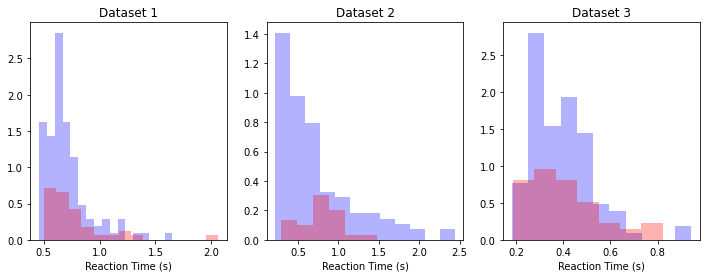

In [2]:
plt.figure(figsize=(12, 4))
for d in range(3):
    plt.subplot(1, 3, d+1)
    dat = pd.read_csv('contest_data_%02d.csv'%(d+1), index_col='Unnamed: 0')
    dhist(dat.loc[dat.correct==1, 'rt'], len(dat))
    dhist(dat.loc[dat.correct==0, 'rt'], len(dat), color='r')
    plt.xlabel('Reaction Time (s)')
    plt.title('Dataset %d' % (d+1))

### Flanker data

These data are a from a single subject performing a standard flanker task. The `cond` column indicates whether the trial was congruent (`+`) or incongruent (`-`). 

In [3]:
dat = pd.read_csv('flanker_s1.csv', index_col='Unnamed: 0')
dat.head()

,cond,correct,rt,trial
1,-,True,0.911576,1
2,-,True,0.512677,2
3,-,True,0.584308,3
4,+,True,0.461280,4
7,+,True,0.697124,5


Text(0.5, 1.0, 'Incongruent')

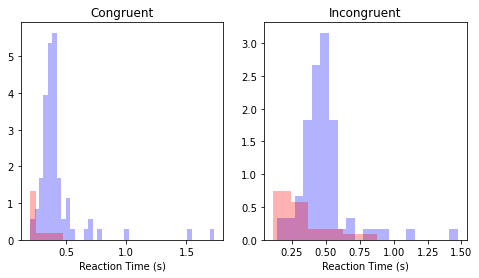

In [4]:
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
dhist(dat.loc[(dat.cond=='+')&(dat.correct==1), 'rt'], (dat.cond=='+').sum())
dhist(dat.loc[(dat.cond=='+')&(dat.correct==0), 'rt'], 
      (dat.cond=='+').sum(), color='r')
plt.xlabel('Reaction Time (s)')
plt.title('Congruent')

plt.subplot(1, 2, 2)
dhist(dat.loc[(dat.cond=='-')&(dat.correct==1), 'rt'], (dat.cond=='-').sum())
dhist(dat.loc[(dat.cond=='-')&(dat.correct==0), 'rt'], 
      (dat.cond=='-').sum(), color='r')
plt.xlabel('Reaction Time (s)')
plt.title('Incongruent')